# SBA Loan Approval Analysis and Prediction

## Part I: Introduction

### Background and Motivation

The U.S. Small Business Administration (SBA) has played a significant role in promoting small business growth through loan guarantees, despite concerns over loan default rates. The debate centers on the trade-off between the risk of defaults on SBA-guaranteed loans and the broader social benefits of supporting small business job creation. This project aims to evaluate the SBA loan guarantee program's impact on credit access, analyze factors leading to loan defaults, and propose ways to improve loan approval processes and market efficiency.

### Data Description

This dataset from the U.S. Small Business Administration (SBA) comprises 899,164 records and 27 columns, totaling 179.43MB, detailing various aspects of SBA loans. 

It includes key identifiers and information about borrowers, such as names and locations (city, state, zip code), as well as detailed loan specifics like the North American Industry Classification System (NAICS) code, loan approval date and fiscal year, loan terms, employment impact, and financial details (amount disbursed, loan status, and SBA's guaranteed portion). 

Here's a detailed description of its features: 

| Variable Name       | Description                                             |
|---------------------|---------------------------------------------------------|
| LoanNr_ChkDgt       | Identifier Primary key                                  |
| Name                | Borrower name                                           |
| City                | Borrower city                                           |
| State               | Borrower state                                          |
| Zip                 | Borrower zip code                                       |
| Bank                | Bank name                                               |
| BankState           | Bank state                                              |
| NAICS               | North American industry classification system code      |
| ApprovalDate        | Date SBA commitment issued                              |
| ApprovalFY          | Fiscal year of commitment                               |
| Term                | Loan term in months                                     |
| NoEmp               | Number of business employees                            |
| NewExist            | 1 = Existing business, 2 = New business                 |
| CreateJob           | Number of jobs created                                  |
| RetainedJob         | Number of jobs retained                                 |
| FranchiseCode       | Franchise code, (00000 or 00001) = No franchise         |
| UrbanRural          | 1 = Urban, 2 = rural, 0 = undefined                     |
| RevLineCr           | Revolving line of credit: Y = Yes, N = No               |
| LowDoc              | LowDoc Loan Program: Y = Yes, N = No                    |
| ChgOffDate          | The date when a loan is declared to be in default       |
| DisbursementDate    | Disbursement date                                       |
| DisbursementGross   | Amount disbursed                                        |
| BalanceGross        | Gross amount outstanding                                |
| MIS_Status          | Loan status charged off = CHGOFF, Paid in full = PIF    |
| ChgOffPrinGr        | Charged-off amount                                      |
| GrAppv              | Gross amount of loan approved by bank                   |
| SBA_Appv            | SBA’s guaranteed amount of approved loan                |

Description of the first two digits of NAICS:

| Sector | Description                                                               |
|--------|---------------------------------------------------------------------------|
| 11     | Agriculture, forestry, fishing and hunting                                |
| 21     | Mining, quarrying, and oil and gas extraction                             |
| 22     | Utilities                                                                 |
| 23     | Construction                                                              |
| 31–33  | Manufacturing                                                             |
| 42     | Wholesale trade                                                           |
| 44–45  | Retail trade                                                              |
| 48–49  | Transportation and warehousing                                            |
| 51     | Information                                                               |
| 52     | Finance and insurance                                                     |
| 53     | Real estate and rental and leasing                                        |
| 54     | Professional, scientific, and technical services                          |
| 55     | Management of companies and enterprises                                   |
| 56     | Administrative and support and waste management and remediation services  |
| 61     | Educational services                                                      |
| 62     | Health care and social assistance                                         |
| 71     | Arts, entertainment, and recreation                                       |
| 72     | Accommodation and food services                                           |
| 81     | Other services (except public administration)                             |
| 92     | Public administration                                                     |


## Part II: Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sba_loans = pd.read_csv('../Should This Loan be Approved or Denied?/SBAnational.csv', low_memory = False)

In [3]:
sba_loans.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
sba_loans.shape

(899164, 27)

In [5]:
sba_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

### Data Cleaning

<font size = 4>Check duplicates<font>

In [6]:
sba_loans.duplicated().sum()

0

<font size = 4>Check missing values</font>

In [7]:
sba_loans.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

<font size="4">Drop rows with missing values in "MIS_Status" since it's the label.</font>

In [8]:
sba_loans.dropna(subset=['MIS_Status'], inplace = True)

<font size="4">For features like "Name", "City", "State", ""Bank", "BankState", "NewExist" ,"RevLineCr", "LowDoc", and "DisbursementDate", the number of missing values are relatively small so that we can choose the drop the rows with missing values in this features.</font>

In [9]:
sba_loans.dropna(subset= ["Name", "City", "State", "Bank", "BankState", "NewExist", "RevLineCr", "LowDoc", "DisbursementDate"], inplace = True)

<font size="4">For "ChgOffDate" feature, we find that it is highly correlated to the label.</font>

In [10]:
sba_loans['ChgOffDate'].isnull().sum()

725369

In [11]:
sba_loans['MIS_Status'].value_counts()

P I F     730199
CHGOFF    156041
Name: MIS_Status, dtype: int64

<font size = 4>The number of paid cases is 725369 , very close to the number of NAs in ChgOffDate which is 730199. We assum that Lloans with an MIS_Status of 'CHGOFF' should have a corresponding ChgOffDate, indicating when the loan was written off as uncollectible. Conversely, loans with an MIS_Status of 'P I F' should have a null or missing ChgOffDate, since those loans were paid in full and never charged off. Based on that, we delete this column 'ChgOffDate'.</font>

In [12]:
sba_loans = sba_loans.drop('ChgOffDate', axis=1)

In [13]:
sba_loans.isnull().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

<font size = 4>'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv' are coming in as strings with the dollar sign, first remove dollar sign and comma <font>

In [14]:
sba_loans[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = sba_loans[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x : x.strip().replace('$','').replace(',',''))

In [15]:
sba_loans.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,0,N,Y,28-Feb-99,60000.00,0.00,P I F,0.00,60000.00,48000.00
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,0,N,Y,31-May-97,40000.00,0.00,P I F,0.00,40000.00,32000.00
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,0,N,N,31-Dec-97,287000.00,0.00,P I F,0.00,287000.00,215250.00
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,0,N,Y,30-Jun-97,35000.00,0.00,P I F,0.00,35000.00,28000.00
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,0,N,N,14-May-97,229000.00,0.00,P I F,0.00,229000.00,229000.00


<font size = 4>Drop features that are apparently irrelavent to our prediction, such as "LoanNr_ChkDgt" and "Name".</font>

In [16]:
sba_loans = sba_loans.drop(columns = ["LoanNr_ChkDgt", "Name"], axis = 1)

<font size = 4>We don't want to focus on influence of time, so we drop features like "ApprovalDate", "ApprovalFY", "DisbursementDate. We also want to avoid data leakage so we delete "ChgOffPrinGr", "BalanceGross".</font>

In [17]:
sba_loans = sba_loans.drop(columns = ["ApprovalDate", "ApprovalFY", "DisbursementDate", "ChgOffPrinGr", "BalanceGross"], axis = 1)

In [18]:
sba_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886240 entries, 0 to 899163
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   City               886240 non-null  object 
 1   State              886240 non-null  object 
 2   Zip                886240 non-null  int64  
 3   Bank               886240 non-null  object 
 4   BankState          886240 non-null  object 
 5   NAICS              886240 non-null  int64  
 6   Term               886240 non-null  int64  
 7   NoEmp              886240 non-null  int64  
 8   NewExist           886240 non-null  float64
 9   CreateJob          886240 non-null  int64  
 10  RetainedJob        886240 non-null  int64  
 11  FranchiseCode      886240 non-null  int64  
 12  UrbanRural         886240 non-null  int64  
 13  RevLineCr          886240 non-null  object 
 14  LowDoc             886240 non-null  object 
 15  DisbursementGross  886240 non-null  object 
 16  MI

<font size = 4>Turn 'NewExist' into str type</font>

In [19]:
sba_loans['NewExist'].value_counts()

1.0    636139
2.0    249080
0.0      1021
Name: NewExist, dtype: int64

In [20]:
# Oops, there's an unxpected value 0. Drop these rows
sba_loans = sba_loans[sba_loans['NewExist'] != 0]
sba_loans['NewExist'].value_counts()

1.0    636139
2.0    249080
Name: NewExist, dtype: int64

In [21]:
exist_or_new_mapping = {
    1: 'Existing business',
    2: 'New business',
}

sba_loans['NewExist'] = sba_loans['NewExist'].map(exist_or_new_mapping)

In [22]:
sba_loans['NewExist'].value_counts()

Existing business    636139
New business         249080
Name: NewExist, dtype: int64

<font size = 4>Handle 'UrbanRural '</font>

In [23]:
sba_loans['UrbanRural'].value_counts()

1    464786
0    316514
2    103919
Name: UrbanRural, dtype: int64

In [24]:
urban_rural_mapping = {
    1: 'Urban',
    2: 'Rural',
    0: 'Undefined' 
}

sba_loans['UrbanRural'] = sba_loans['UrbanRural'].map(urban_rural_mapping)

In [25]:
sba_loans['UrbanRural'].value_counts()

Urban        464786
Undefined    316514
Rural        103919
Name: UrbanRural, dtype: int64

In [26]:
# Too much undefined data. Handle later

<font size = 4>Turn 'NAICS' into categorical values</font>

In [27]:
sba_loans = sba_loans.astype({'NAICS': 'str'})

In [28]:
sba_loans['NAICS'].value_counts()

0         197973
722110     27715
722211     19314
811111     14380
621210     13839
           ...  
925120         1
312210         1
112420         1
524192         1
314992         1
Name: NAICS, Length: 1311, dtype: int64

In [29]:
# create a 'Industry'column by the first 2 digits of NAICS

sba_loans['Industry'] = sba_loans['NAICS'].apply(lambda x : x[:2])
sba_loans['Industry'] = sba_loans['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})   

In [30]:
sba_loans['Industry'].value_counts()

Retail_trade                125648
Other_no_pub                 71685
Manufacturing                67013
Accom/Food_serv              66974
Prof/Science/Tech            66909
Construction                 65579
Healthcare/Social_assist     54569
Wholesale_trade              48078
Admin_sup/Waste_Mgmt_Rem     32086
Trans/Ware                   22127
Arts/Entertain/Rec           14439
RE/Rental/Lease              13452
Information                  11210
Finance/Insurance             9369
Ag/For/Fish/Hunt              8849
Educational                   6310
Min/Quar/Oil_Gas_ext          1818
Utilities                      653
Mgmt_comp                      256
Public_Admin                   222
Name: Industry, dtype: int64

In [31]:
sba_loans = sba_loans.drop('NAICS', axis=1)

<font size = 4>Given that a large number of entries have a FranchiseCode of 1 or 0, it seems that we could simply keep this as a binary feature indicating "franchise" vs "not a franchise.</font>

In [32]:
sba_loans['FranchiseCode'].value_counts()

1        630512
0        203577
78760      3333
68020      1914
50564      1021
          ...  
89631         1
14424         1
91107         1
24421         1
15930         1
Name: FranchiseCode, Length: 2753, dtype: int64

In [33]:
# Convert FranchiseCode into a binary indicator for whether it's a franchise
sba_loans['IsFranchise'] = sba_loans['FranchiseCode'].apply(lambda x: 'No Franchise' if x in [0, 1] else 'Is Franchise')

In [34]:
sba_loans['IsFranchise'].value_counts()

No Franchise    834089
Is Franchise     51130
Name: IsFranchise, dtype: int64

In [35]:
sba_loans = sba_loans.drop('FranchiseCode', axis=1)

In [36]:
sba_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885219 entries, 0 to 899163
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   City               885219 non-null  object
 1   State              885219 non-null  object
 2   Zip                885219 non-null  int64 
 3   Bank               885219 non-null  object
 4   BankState          885219 non-null  object
 5   Term               885219 non-null  int64 
 6   NoEmp              885219 non-null  int64 
 7   NewExist           885219 non-null  object
 8   CreateJob          885219 non-null  int64 
 9   RetainedJob        885219 non-null  int64 
 10  UrbanRural         885219 non-null  object
 11  RevLineCr          885219 non-null  object
 12  LowDoc             885219 non-null  object
 13  DisbursementGross  885219 non-null  object
 14  MIS_Status         885219 non-null  object
 15  GrAppv             885219 non-null  object
 16  SBA_Appv           8

<font size = 4>Handle "City"</font>

In [37]:
sba_loans['City'].value_counts()

LOS ANGELES                       11464
HOUSTON                           10121
NEW YORK                           7752
CHICAGO                            5928
MIAMI                              5540
                                  ...  
SAINT DAVID                           1
BEACH CITY                            1
HAWTHORNE (CORPORATE NAME FOR         1
STATUE OF LIBERTY NATIONAL MON        1
SO. OZONE PARK                        1
Name: City, Length: 32255, dtype: int64

In [38]:
sba_loans['City'].value_counts().to_frame().describe()

,City
count,32255.000000
mean,27.444396
std,170.512369
min,1.000000
25%,1.000000
50%,2.000000
75%,10.000000
max,11464.000000


City has too many unique values.Since we have state that represent the geographical information, we decide to drop the feature.

In [39]:
sba_loans = sba_loans.drop('City', axis=1)

<font size = 4>Nothing wrong with "State".</font>

In [40]:
sba_loans['State'].value_counts()

CA    129286
TX     69293
NY     56799
FL     40659
PA     34203
OH     32179
IL     29128
MA     24702
MN     24117
NJ     23803
WA     22951
GA     21981
WI     20750
MO     20364
CO     20325
MI     20261
UT     18602
AZ     17415
NC     14038
IN     13878
MD     13043
VA     12911
CT     11973
NH     11869
IA     11759
KS     11297
OR     10928
OK      9781
LA      9420
ID      9236
TN      9229
RI      8834
MT      8599
AL      8242
NV      7899
KY      7604
MS      7545
NE      6273
AR      6223
NM      5934
ME      5851
SC      5502
VT      5354
ND      5180
SD      4347
HI      3538
WV      3223
WY      2785
AK      2354
DE      2157
DC      1595
Name: State, dtype: int64

<font size = 4>Handle Zip</font>

In [41]:
# Drop 'Zip' and only use "State" to represesnt geographic information
sba_loans = sba_loans.drop('Zip', axis = 1)

<font size = 4>Implement the same strategy with "Bank" as "City".</font>

In [42]:
sba_loans['Bank'].value_counts()

BANK OF AMERICA NATL ASSOC        86036
WELLS FARGO BANK NATL ASSOC       62882
JPMORGAN CHASE BANK NATL ASSOC    47447
U.S. BANK NATIONAL ASSOCIATION    34729
CITIZENS BANK NATL ASSOC          33567
                                  ...  
THE COWLITZ BANK                      1
BLOOMBURG STATE BANK                  1
FDIC/ADDISON CONSOLIDATED OFFI        1
FINANCIAL RES. MGMT INC-NCNB-T        1
DEPCO                                 1
Name: Bank, Length: 5785, dtype: int64

In [43]:
sba_loans['Bank'].value_counts().to_frame().describe()

,Bank
count,5785.000000
mean,153.019706
std,1817.109478
min,1.000000
25%,2.000000
50%,9.000000
75%,38.000000
max,86036.000000


In [44]:
sba_loans = sba_loans.drop('Bank', axis=1)

<font size = 4>Nothing wrong with "BankState".</font>

In [45]:
sba_loans['BankState'].value_counts()

CA    116640
NC     78661
IL     64889
OH     57871
SD     50595
TX     47207
RI     43841
NY     39148
VA     28778
DE     24352
MN     19745
UT     18827
PA     16752
WI     15240
MO     14645
FL     13645
GA     13609
MA     13597
AL     11969
OR     11155
WA     10544
CO     10431
CT      9783
IA      9721
NJ      9320
KS      8739
MT      7727
IN      7506
SC      7407
MI      7256
OK      7212
MD      6910
NH      6690
AR      6208
MS      5832
TN      5546
NE      5246
ND      5045
LA      5004
VT      4682
NM      4340
KY      4289
NV      4284
ID      4251
DC      3950
AZ      3903
ME      3632
HI      2933
WY      2128
WV      1973
AK      1400
PR       154
GU         4
AN         1
EN         1
VI         1
Name: BankState, dtype: int64

<font size = 4>Add a new column 'SameState' with 'Yes' if 'State' and 'BankState' are the same, 'No' otherwise</font>

In [46]:
sba_loans['SameState'] = sba_loans.apply(lambda x: 'Yes' if x['State'] == x['BankState'] else 'No', axis=1)

In [47]:
sba_loans['SameState'].value_counts()

Yes    467221
No     417998
Name: SameState, dtype: int64

In [48]:
sba_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885219 entries, 0 to 899163
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   State              885219 non-null  object
 1   BankState          885219 non-null  object
 2   Term               885219 non-null  int64 
 3   NoEmp              885219 non-null  int64 
 4   NewExist           885219 non-null  object
 5   CreateJob          885219 non-null  int64 
 6   RetainedJob        885219 non-null  int64 
 7   UrbanRural         885219 non-null  object
 8   RevLineCr          885219 non-null  object
 9   LowDoc             885219 non-null  object
 10  DisbursementGross  885219 non-null  object
 11  MIS_Status         885219 non-null  object
 12  GrAppv             885219 non-null  object
 13  SBA_Appv           885219 non-null  object
 14  Industry           687246 non-null  object
 15  IsFranchise        885219 non-null  object
 16  SameState          8

<font size = 4>Remove the values in the 'RevLineCr' column except for 'Y' (Yes) and 'N' (No)</font>

In [49]:
sba_loans['RevLineCr'].value_counts()

N    414512
0    257307
Y    198236
T     15100
1        22
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: RevLineCr, dtype: int64

In [50]:
sba_loans= sba_loans[(sba_loans['RevLineCr'] == 'Y') | (sba_loans['RevLineCr'] == 'N')]

In [51]:
sba_loans['RevLineCr'].value_counts()

N    414512
Y    198236
Name: RevLineCr, dtype: int64

<font size = 4>Remove the values in the 'LowDoc' column except for 'Y' (Yes) and 'N' (No)</font>

In [52]:
sba_loans['LowDoc'].value_counts()

N    553109
Y     57078
0      1146
C       693
S       561
A       103
R        57
1         1
Name: LowDoc, dtype: int64

In [53]:
sba_loans= sba_loans[(sba_loans['LowDoc'] == 'Y') | (sba_loans['LowDoc'] == 'N')]

In [54]:
sba_loans['LowDoc'].value_counts()

N    553109
Y     57078
Name: LowDoc, dtype: int64

In [55]:
sba_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610187 entries, 0 to 899163
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   State              610187 non-null  object
 1   BankState          610187 non-null  object
 2   Term               610187 non-null  int64 
 3   NoEmp              610187 non-null  int64 
 4   NewExist           610187 non-null  object
 5   CreateJob          610187 non-null  int64 
 6   RetainedJob        610187 non-null  int64 
 7   UrbanRural         610187 non-null  object
 8   RevLineCr          610187 non-null  object
 9   LowDoc             610187 non-null  object
 10  DisbursementGross  610187 non-null  object
 11  MIS_Status         610187 non-null  object
 12  GrAppv             610187 non-null  object
 13  SBA_Appv           610187 non-null  object
 14  Industry           456940 non-null  object
 15  IsFranchise        610187 non-null  object
 16  SameState          6

<font size = 4>Handle missing values in Industry</font>

In [56]:
# Fill missing values in 'Industry' with a new category 'Unknown'
sba_loans['Industry'] = sba_loans['Industry'].fillna('Unknown')

In [57]:
sba_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610187 entries, 0 to 899163
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   State              610187 non-null  object
 1   BankState          610187 non-null  object
 2   Term               610187 non-null  int64 
 3   NoEmp              610187 non-null  int64 
 4   NewExist           610187 non-null  object
 5   CreateJob          610187 non-null  int64 
 6   RetainedJob        610187 non-null  int64 
 7   UrbanRural         610187 non-null  object
 8   RevLineCr          610187 non-null  object
 9   LowDoc             610187 non-null  object
 10  DisbursementGross  610187 non-null  object
 11  MIS_Status         610187 non-null  object
 12  GrAppv             610187 non-null  object
 13  SBA_Appv           610187 non-null  object
 14  Industry           610187 non-null  object
 15  IsFranchise        610187 non-null  object
 16  SameState          6

<font size = 4>Handle "DisbursementGross", "GrAppv", "SBA_Appv"<font>

In [58]:
# There's some kind of overlap between "DisbursementGross" and "GrAppv". We decide to keep the "DisbursementGross".
sba_loans = sba_loans.drop("GrAppv", axis = 1)

In [59]:
# Turn this two columns into int types
sba_loans["DisbursementGross"] = sba_loans["DisbursementGross"].astype(float)
sba_loans["SBA_Appv"] = sba_loans["SBA_Appv"].astype(float)

In [60]:
sba_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610187 entries, 0 to 899163
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              610187 non-null  object 
 1   BankState          610187 non-null  object 
 2   Term               610187 non-null  int64  
 3   NoEmp              610187 non-null  int64  
 4   NewExist           610187 non-null  object 
 5   CreateJob          610187 non-null  int64  
 6   RetainedJob        610187 non-null  int64  
 7   UrbanRural         610187 non-null  object 
 8   RevLineCr          610187 non-null  object 
 9   LowDoc             610187 non-null  object 
 10  DisbursementGross  610187 non-null  float64
 11  MIS_Status         610187 non-null  object 
 12  SBA_Appv           610187 non-null  float64
 13  Industry           610187 non-null  object 
 14  IsFranchise        610187 non-null  object 
 15  SameState          610187 non-null  object 
dtypes:

## EDA

In [61]:
sba_loans.describe()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,SBA_Appv
count,610187.000000,610187.000000,610187.000000,610187.000000,6.101870e+05,6.101870e+05
mean,105.135426,11.976366,11.116146,13.323293,1.844555e+05,1.341332e+05
std,75.548121,75.423256,285.178477,285.272915,2.670066e+05,2.106117e+05
min,0.000000,0.000000,0.000000,0.000000,4.000000e+03,5.000000e+02
25%,60.000000,2.000000,0.000000,0.000000,4.000000e+04,1.750000e+04
50%,84.000000,4.000000,0.000000,0.000000,9.150000e+04,5.000000e+04
75%,120.000000,11.000000,1.000000,4.000000,2.170000e+05,1.570000e+05
max,527.000000,9999.000000,8800.000000,8800.000000,1.144632e+07,4.500000e+06


In [62]:
sns.set_style("whitegrid")

<font size = 4>Univariate Analysis.</font>

<font size = 4>Firstly handle the numeric values</font>

<font size = 4>Plot the distribution of the 'Term' column.</font>

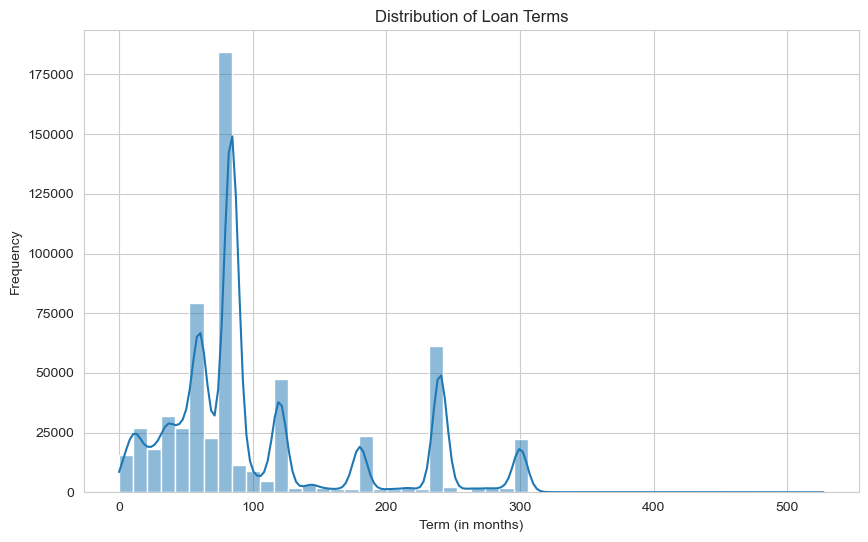

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(sba_loans['Term'], bins=50, kde=True)
plt.title('Distribution of Loan Terms')
plt.xlabel('Term (in months)')
plt.ylabel('Frequency')
plt.show()

In [64]:
# There are too many outliers so we decide to trim the data.
sba_loans = sba_loans[sba_loans['Term'] <= 300]

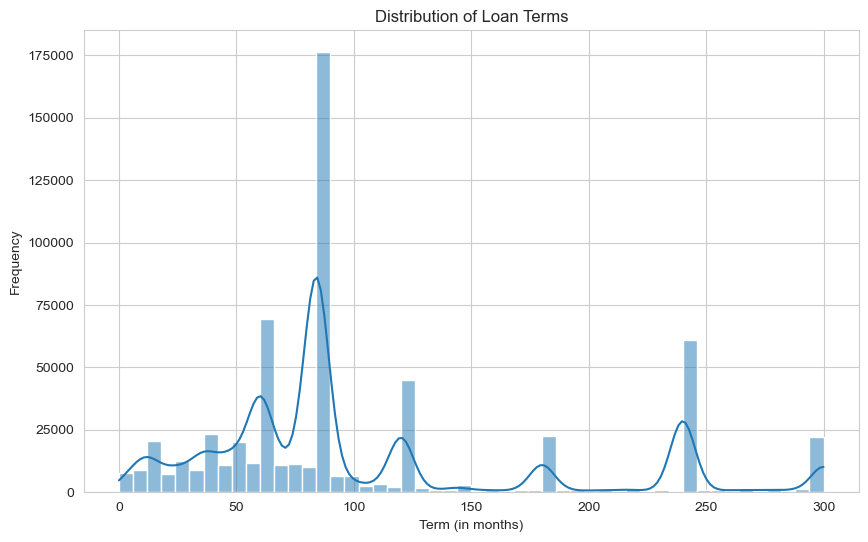

In [65]:
# Replot
plt.figure(figsize=(10, 6))
sns.histplot(sba_loans['Term'], bins=50, kde=True)
plt.title('Distribution of Loan Terms')
plt.xlabel('Term (in months)')
plt.ylabel('Frequency')
plt.show()

In [66]:
# Check the relationship between "Term" and "MIS_Status"

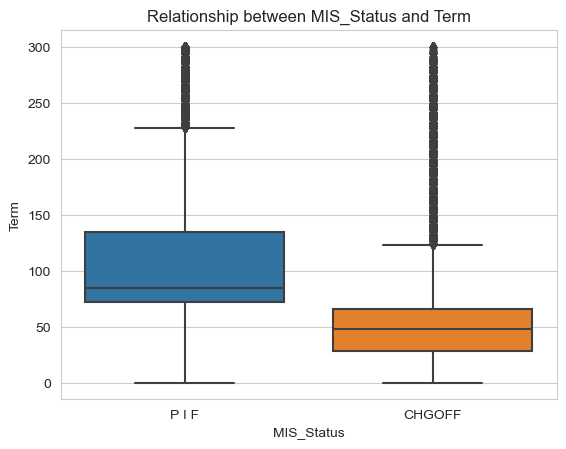

In [67]:
sns.boxplot(x='MIS_Status', y='Term', data=sba_loans)
plt.title('Relationship between MIS_Status and Term')
plt.show()

#### Based on the box plot, we make the hypothesis longer-term loans have a higher likelihood of being paid in full, whereas shorter-term loans might be more susceptible to being charged off.

<font size = 4>Plot the distribution of the 'NoEmp' (Number of Employees) column</font>

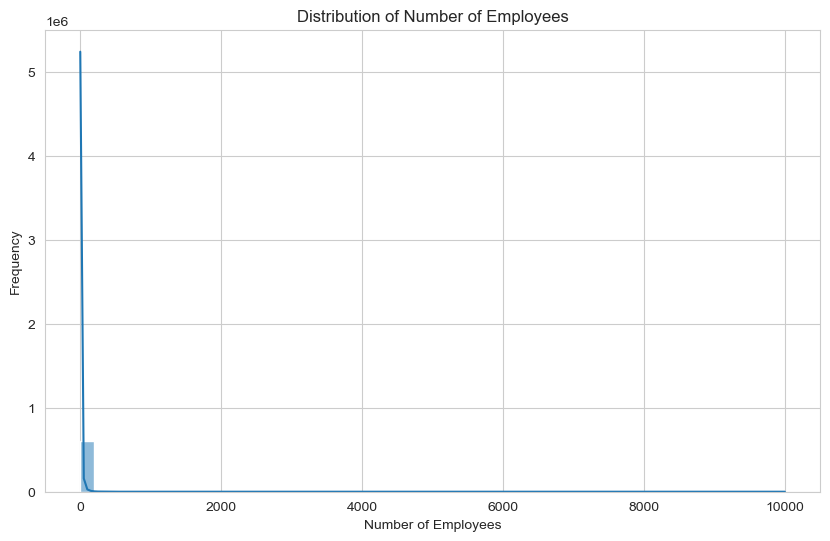

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(sba_loans['NoEmp'], bins=50, kde=True)
plt.title('Distribution of Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Frequency')
plt.show()

In [69]:
sba_loans['NoEmp'].value_counts()

1       101741
2        90999
3        60107
4        49201
5        40410
         ...  
464          1
680          1
608          1
5511         1
1920         1
Name: NoEmp, Length: 529, dtype: int64

In [70]:
# Since we're dealing with small business loans where applicants are expected to have a certain maximum number of employees
# We decide to trim the data represent businesses with a large number of employees.

In [71]:
sba_loans = sba_loans[sba_loans['NoEmp'] <= 60]

In [72]:
# Replot

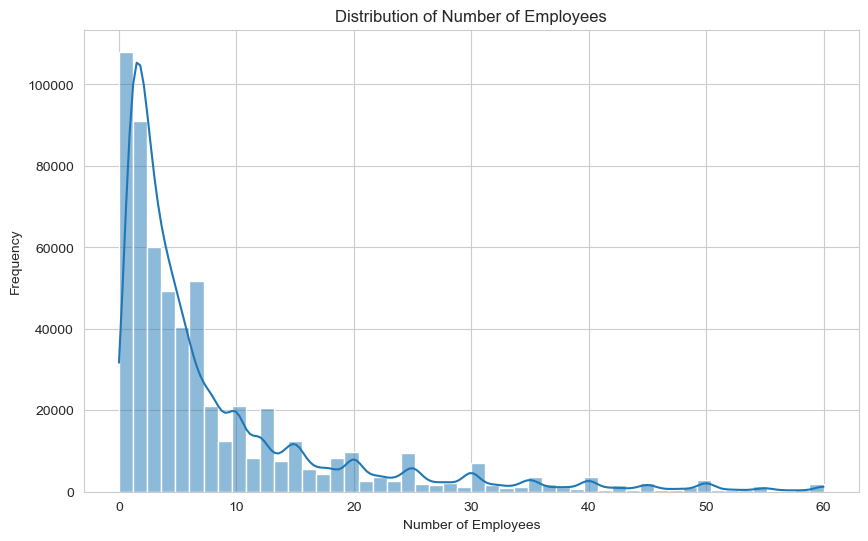

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(sba_loans['NoEmp'], bins=50, kde=True)
plt.title('Distribution of Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Frequency')
plt.show()

In [74]:
# Check the relationship between "NoEmp" and "MIS_Status"

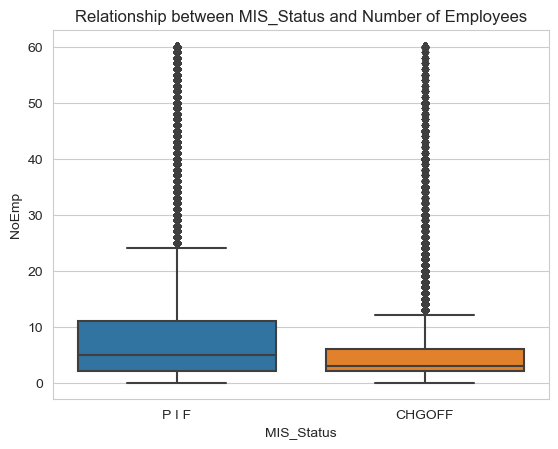

In [75]:
sns.boxplot(x='MIS_Status', y='NoEmp', data=sba_loans)
plt.title('Relationship between MIS_Status and Number of Employees')
plt.show()

#### We cannot draw any assumption from this box plot because the median values are quite close and outliers are too much

<font size = 4>Plot the distribution of the 'CreateJob' (Number of jobs created) column</font>

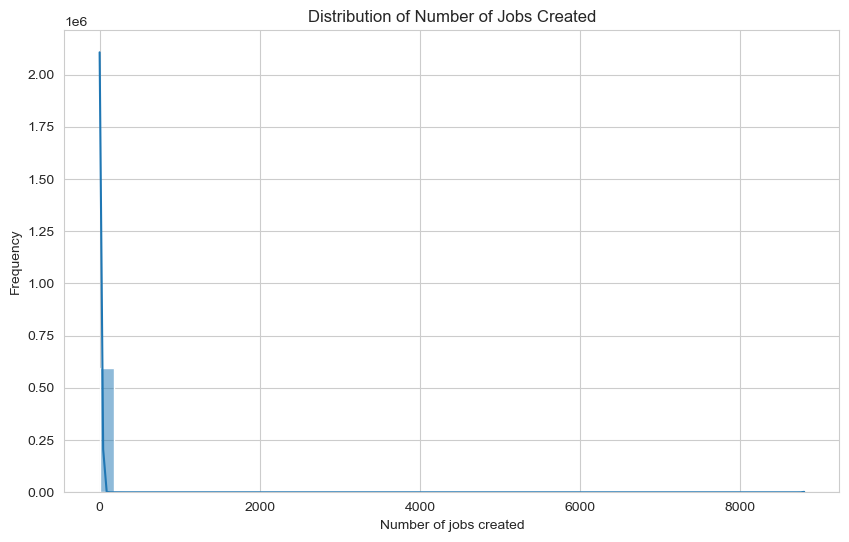

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(sba_loans['CreateJob'], bins=50, kde=True)
plt.title('Distribution of Number of Jobs Created')
plt.xlabel('Number of jobs created')
plt.ylabel('Frequency')
plt.show()

In [77]:
sba_loans['CreateJob'].value_counts()

0       438146
1        39894
2        34111
3        16039
4        11256
         ...  
76           1
144          1
179          1
171          1
1016         1
Name: CreateJob, Length: 157, dtype: int64

#### As we can see most of the companies do not create any job, could we categorize this feature into "WhetherCreateJob"?

In [78]:
sba_loans['WhetherCreateJob'] = sba_loans['CreateJob'].apply(lambda x: 'Yes' if x > 0 else 'No')

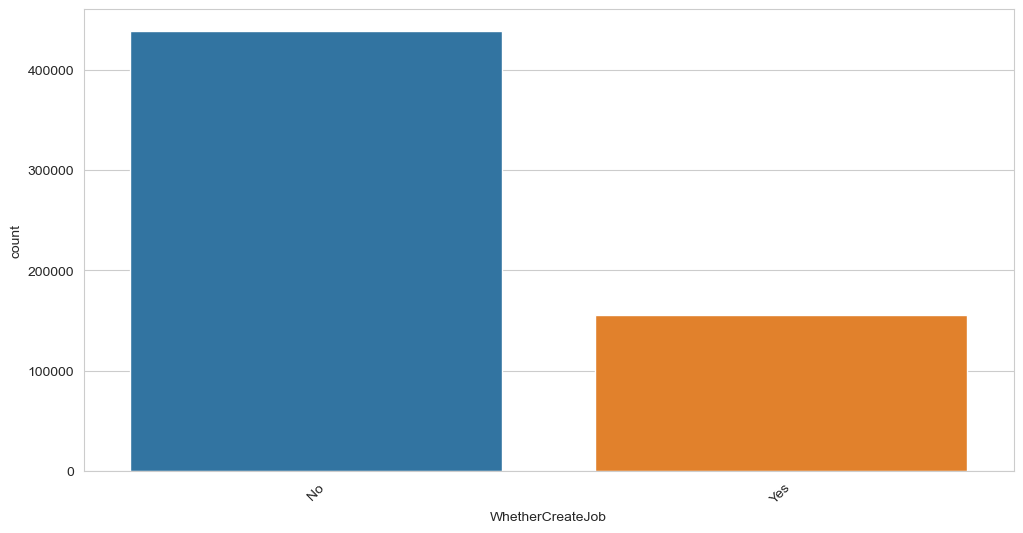

In [79]:
plt.figure(figsize=(12,6))
sns.countplot(data = sba_loans, x = 'WhetherCreateJob')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Count')

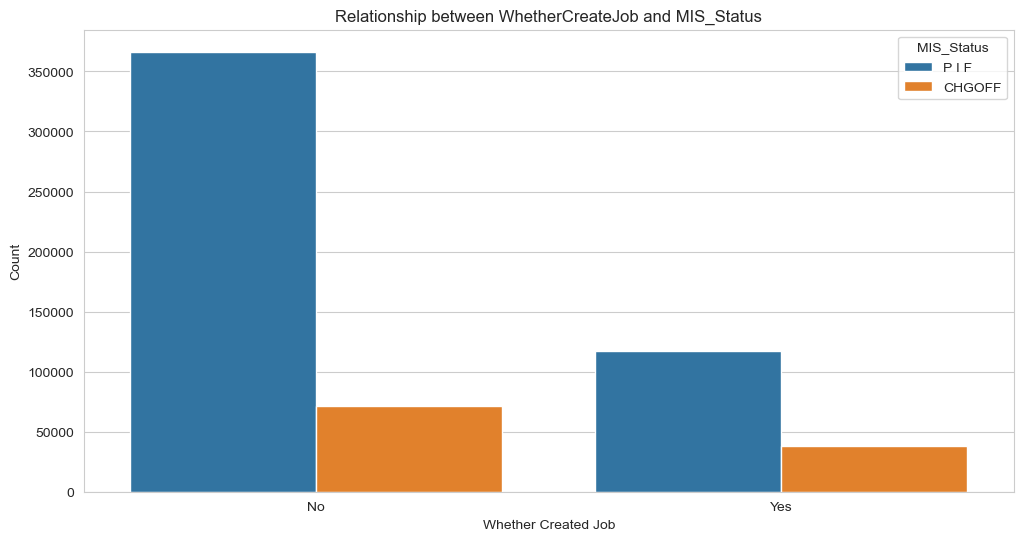

In [80]:
plt.figure(figsize=(12, 6))
sns.countplot(data=sba_loans, x='WhetherCreateJob', hue='MIS_Status')
plt.title('Relationship between WhetherCreateJob and MIS_Status')
plt.xlabel('Whether Created Job')
plt.ylabel('Count') 

####  The pattern that companies paid in full are much more than companies charged off applys to both category.

In [81]:
# There's no obvious difference, we drop this new_created feature
sba_loans = sba_loans.drop('WhetherCreateJob', axis = 1)

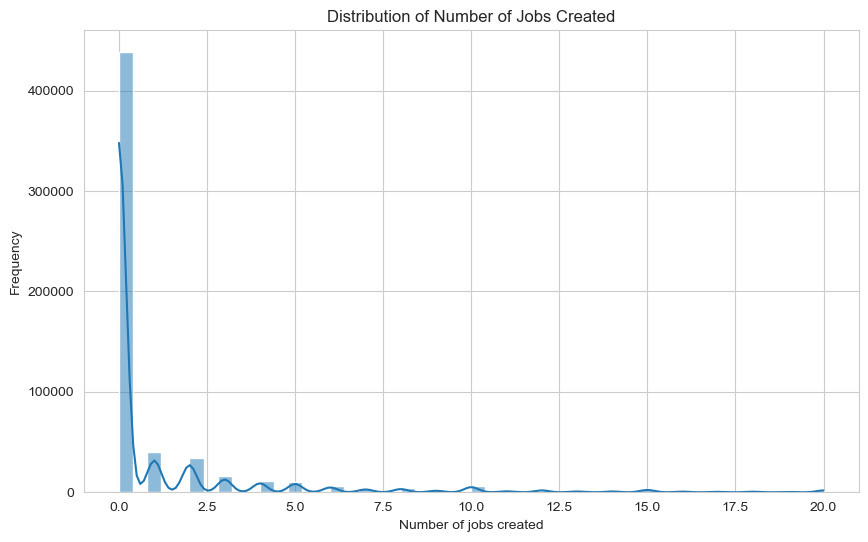

In [82]:
# Let us see the distribution for number of jobs created that are less than 20
plt.figure(figsize=(10, 6))
sns.histplot(sba_loans['CreateJob'][sba_loans['CreateJob']<=20], bins=50, kde=True)
plt.title('Distribution of Number of Jobs Created')
plt.xlabel('Number of jobs created')
plt.ylabel('Frequency')
plt.show()

In [83]:
sba_loans = sba_loans[sba_loans['CreateJob'] <= 20]

In [84]:
# Check the relationship between "CreateJob" and "MIS_Status"

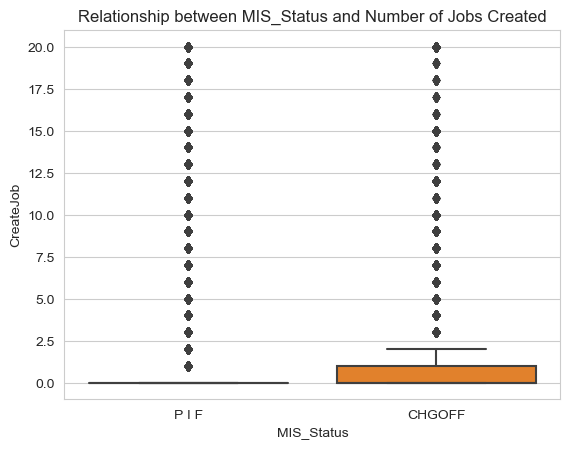

In [85]:
sns.boxplot(x='MIS_Status', y='CreateJob', data=sba_loans)
plt.title('Relationship between MIS_Status and Number of Jobs Created')
plt.show()

### There is no obvious distinction between the two categories (PIF and CHGOFF) in terms of the number of jobs created. Both categories have a similar pattern of outliers, which means that the number of jobs created may not be a distinguishing factor between loans that are paid in full and those that default.

<font size = 4>Plot the distribution of the 'RetainedJob' (Number of jobs retained) column</font>

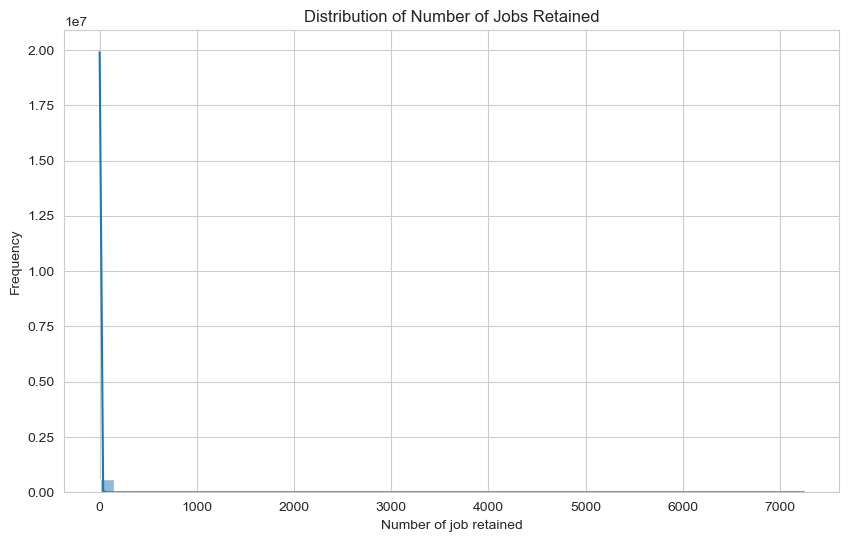

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(sba_loans['RetainedJob'], bins=50, kde=True)
plt.title('Distribution of Number of Jobs Retained')
plt.xlabel('Number of job retained')
plt.ylabel('Frequency')
plt.show()

In [87]:
sba_loans['RetainedJob'].value_counts()

0      298273
1       59001
2       49988
3       33154
4       26097
        ...  
157         1
267         1
404         1
107         1
900         1
Name: RetainedJob, Length: 110, dtype: int64

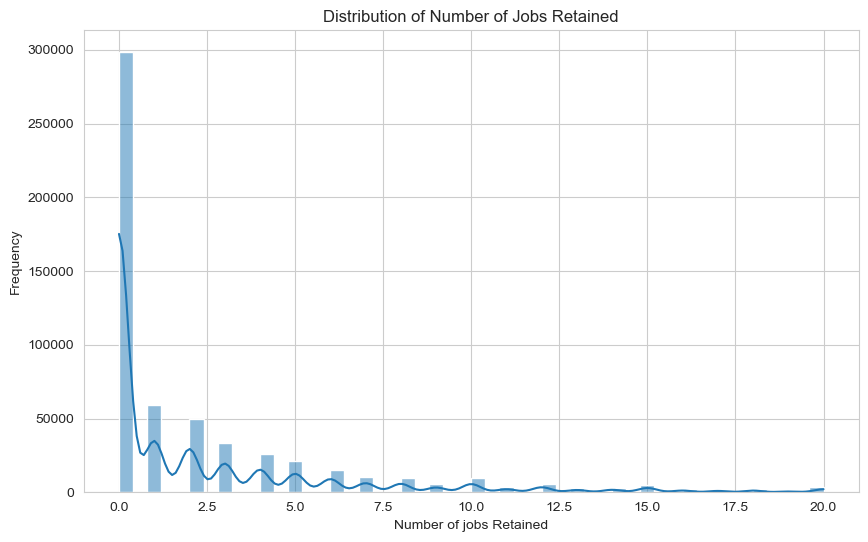

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(sba_loans['RetainedJob'][sba_loans['RetainedJob']<=20], bins=50, kde=True)
plt.title('Distribution of Number of Jobs Retained')
plt.xlabel('Number of jobs Retained')
plt.ylabel('Frequency')
plt.show()

In [89]:
sba_loans = sba_loans[sba_loans['RetainedJob'] <= 20]

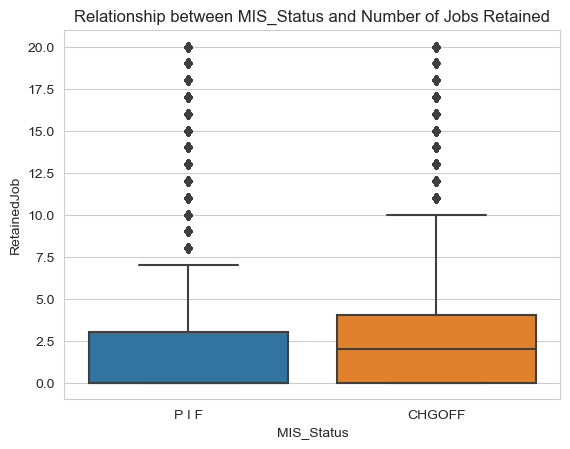

In [90]:
sns.boxplot(x='MIS_Status', y='RetainedJob', data=sba_loans)
plt.title('Relationship between MIS_Status and Number of Jobs Retained')
plt.show()

#### There is no apparent difference between the two groups concerning the median number of jobs retained. Both groups have many outliers, indicating that some businesses retain a lot more jobs than typical businesses in the dataset, regardless of whether the loan was paid in full or charged off. So we guess there are no strong relationship between "RetainedJob" and "MIS_Status"

<font size = 4>Plot the distribution of the 'Disbursement Gross' column.</font>

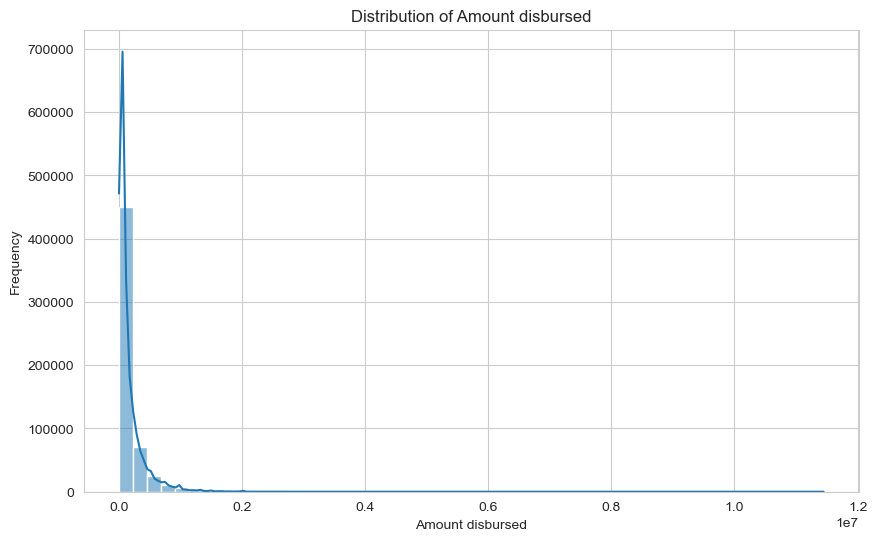

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(sba_loans['DisbursementGross'], bins=50, kde=True)
plt.title('Distribution of Amount disbursed')
plt.xlabel('Amount disbursed')
plt.ylabel('Frequency')
plt.show()

In [92]:
sba_loans = sba_loans[sba_loans['DisbursementGross'] <= 1000000]

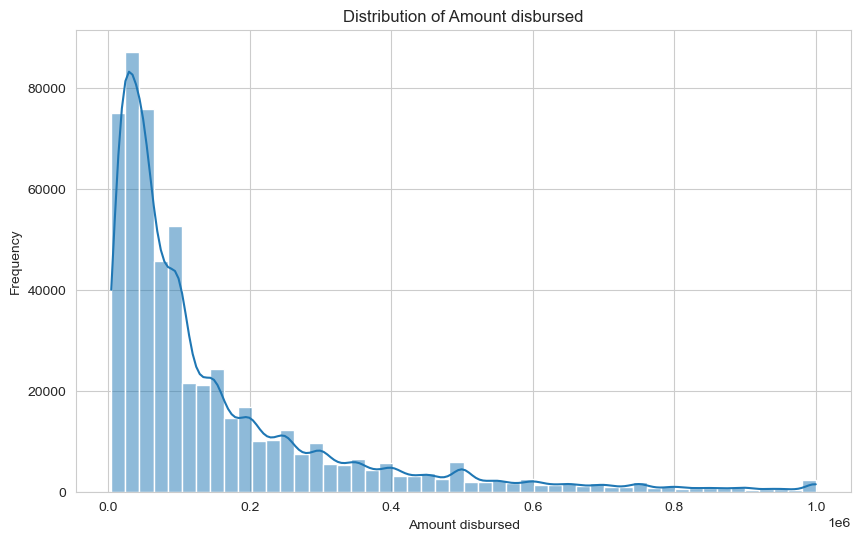

In [93]:
# Replot
plt.figure(figsize=(10, 6))
sns.histplot(sba_loans['DisbursementGross'], bins=50, kde=True)
plt.title('Distribution of Amount disbursed')
plt.xlabel('Amount disbursed')
plt.ylabel('Frequency')
plt.show()

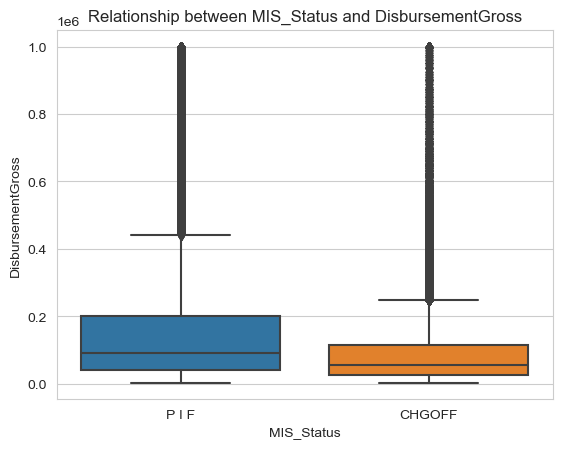

In [94]:
# Check the replationship between MIS_Status and "DisbursementGross"
sns.boxplot(x='MIS_Status', y='DisbursementGross', data=sba_loans)
plt.title('Relationship between MIS_Status and DisbursementGross')
plt.show()

#### It can be seen that loans with higher disbursement amounts are more likely to be pain in full, whereas loans with lower disbursement amounts are more likely to be charged off. 

<font size = 4>Plot the distribution of the 'SBA_Appv' column.</font>

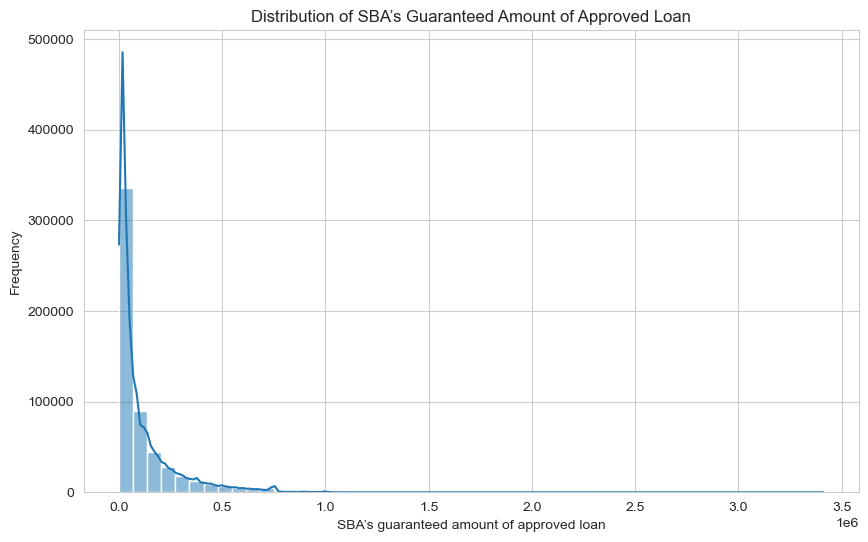

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(sba_loans['SBA_Appv'], bins=50, kde=True)
plt.title('Distribution of SBA’s Guaranteed Amount of Approved Loan')
plt.xlabel('SBA’s guaranteed amount of approved loan')
plt.ylabel('Frequency')
plt.show()

In [96]:
sba_loans = sba_loans[sba_loans['SBA_Appv'] <= 1000000]

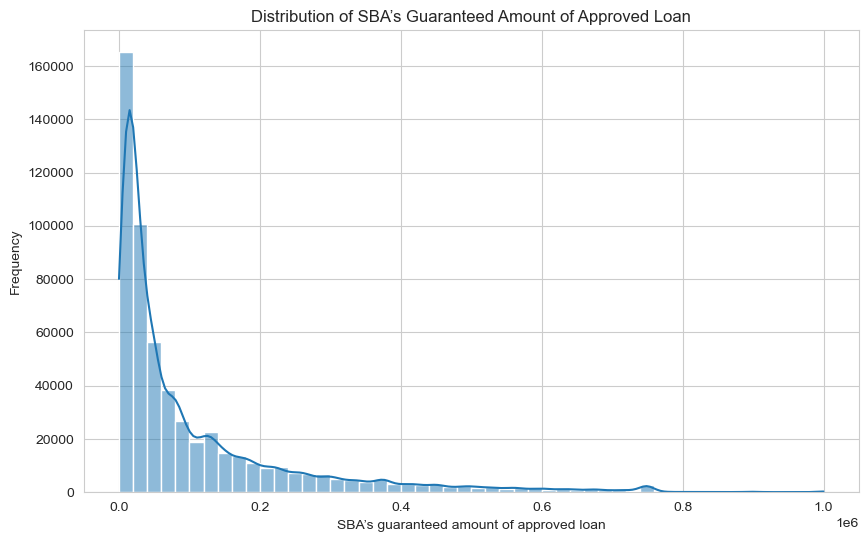

In [97]:
#Replot
plt.figure(figsize=(10, 6))
sns.histplot(sba_loans['SBA_Appv'], bins=50, kde=True)
plt.title('Distribution of SBA’s Guaranteed Amount of Approved Loan')
plt.xlabel('SBA’s guaranteed amount of approved loan')
plt.ylabel('Frequency')
plt.show()

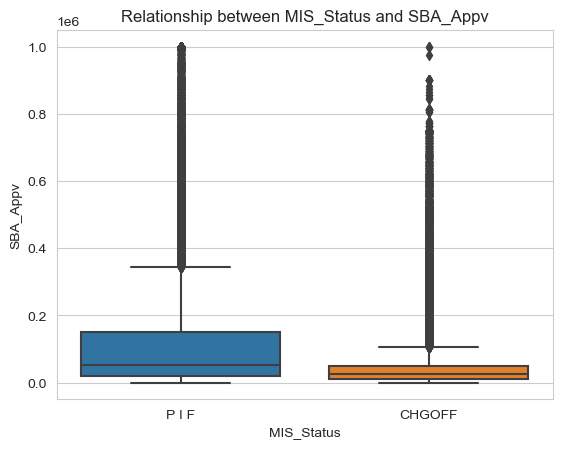

In [98]:
# Check the replationship between MIS_Status and "DisbursementGross"
sns.boxplot(x='MIS_Status', y='SBA_Appv', data=sba_loans)
plt.title('Relationship between MIS_Status and SBA_Appv')
plt.show()

#### It can be seen that companies with higher SBA’s guaranteed amount of approved loan are likely to pay in full. 

<font size = 4>Continues with Categorical variables.</font>

<font size = 4>Firstly check the distribution of our label</font>

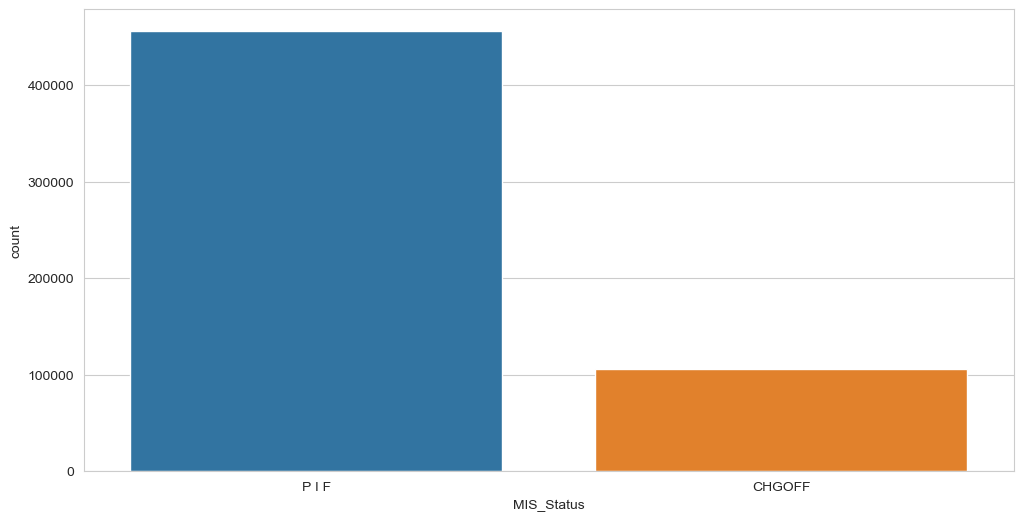

In [99]:
plt.figure(figsize=(12,6))
sns.countplot(data = sba_loans, x = 'MIS_Status')
plt.show()

<font size = 4>Plot the count of the 'State' column</font>

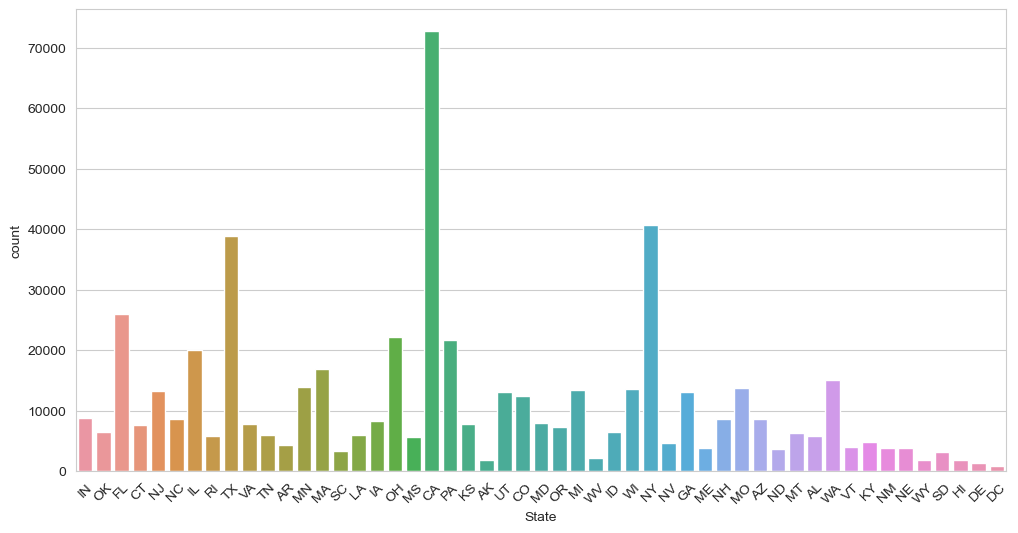

In [100]:
plt.figure(figsize=(12,6))
sns.countplot(data = sba_loans, x = 'State')
plt.xticks(rotation=45)
plt.show()

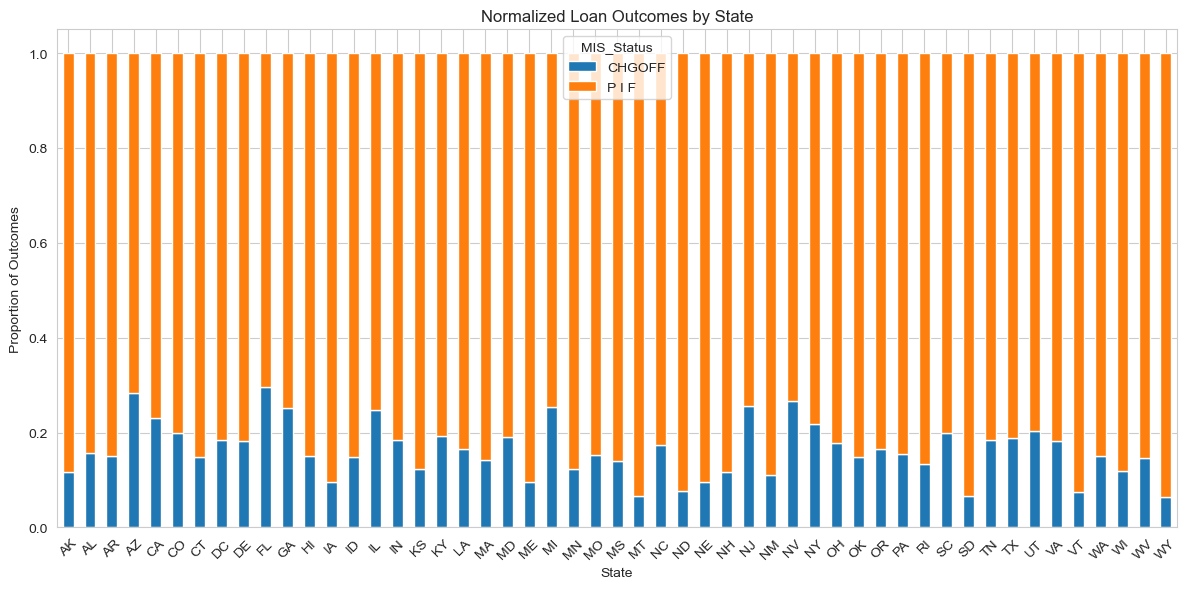

In [101]:
crosstab = pd.crosstab(sba_loans['State'], sba_loans['MIS_Status'], normalize='index')

crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Normalized Loan Outcomes by State')
plt.xlabel('State')
plt.ylabel('Proportion of Outcomes')
plt.xticks(rotation=45)
plt.legend(title='MIS_Status')
plt.tight_layout()  
plt.show()

#### Each state has a certain proportion of loans that have been paid in full and loans that have been charged off. Among them,  Arizona, Florida, New Jersy and Neveda seem to have a higher rate of charged-off loans.

<font size = 4>Plot the count of the 'BankState' column</font>

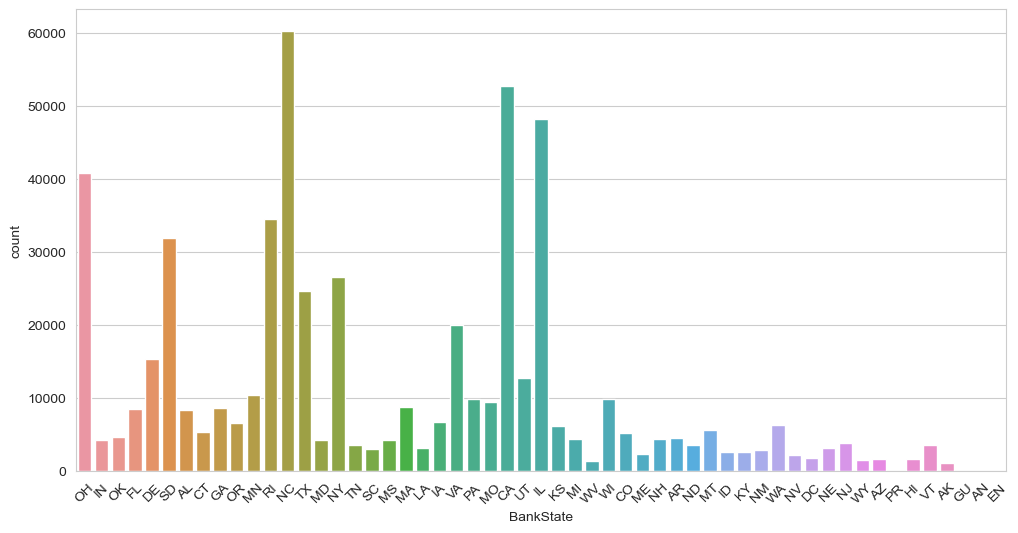

In [102]:
plt.figure(figsize=(12,6))
sns.countplot(data = sba_loans, x = 'BankState')
plt.xticks(rotation=45)
plt.show()

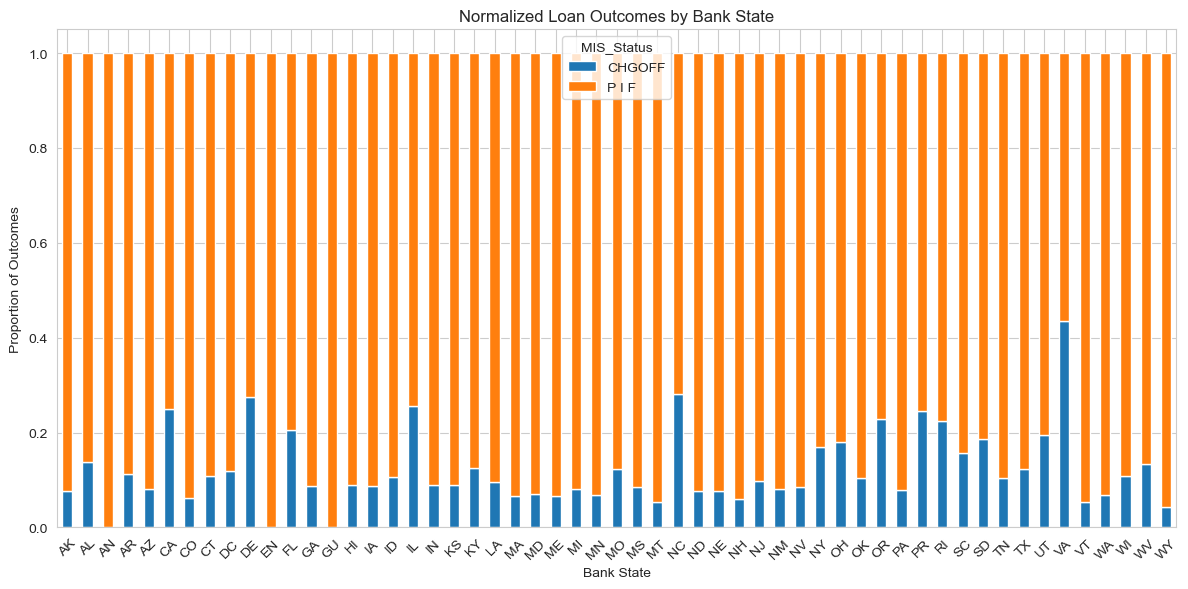

In [103]:
bankstate_crosstab = pd.crosstab(sba_loans['BankState'], sba_loans['MIS_Status'])

bankstate_crosstab_normalized = bankstate_crosstab.div(bankstate_crosstab.sum(axis=1), axis=0)

bankstate_crosstab_normalized.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Normalized Loan Outcomes by Bank State')
plt.xlabel('Bank State')
plt.ylabel('Proportion of Outcomes')
plt.xticks(rotation=45)
plt.legend(title='MIS_Status')
plt.tight_layout()
plt.show()

#### Banks from Virginia have a noticeably higher proportion of 'CHGOFF' loans.

<font size = 4>Plot the count of the 'NewExist ' column</font>

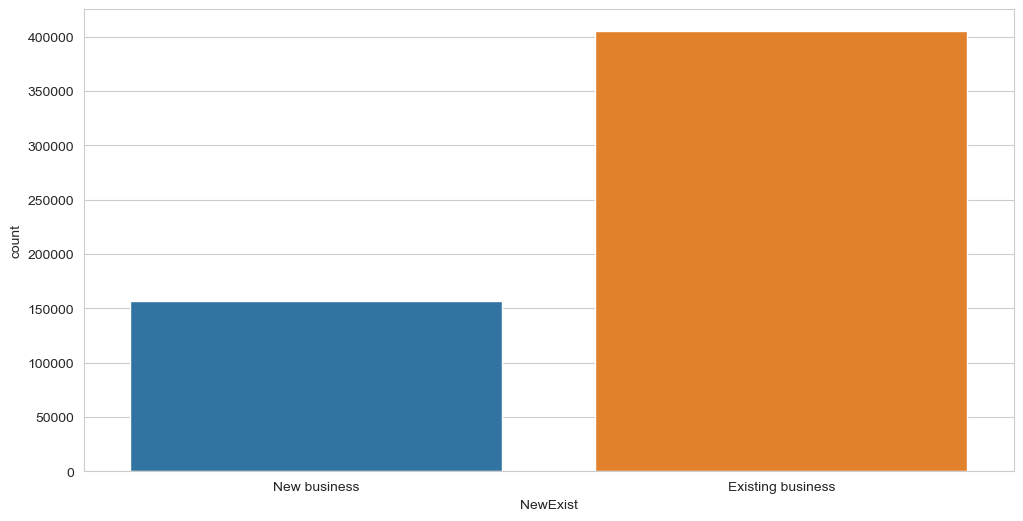

In [104]:
plt.figure(figsize=(12,6))
sns.countplot(data = sba_loans, x = 'NewExist')
plt.show()

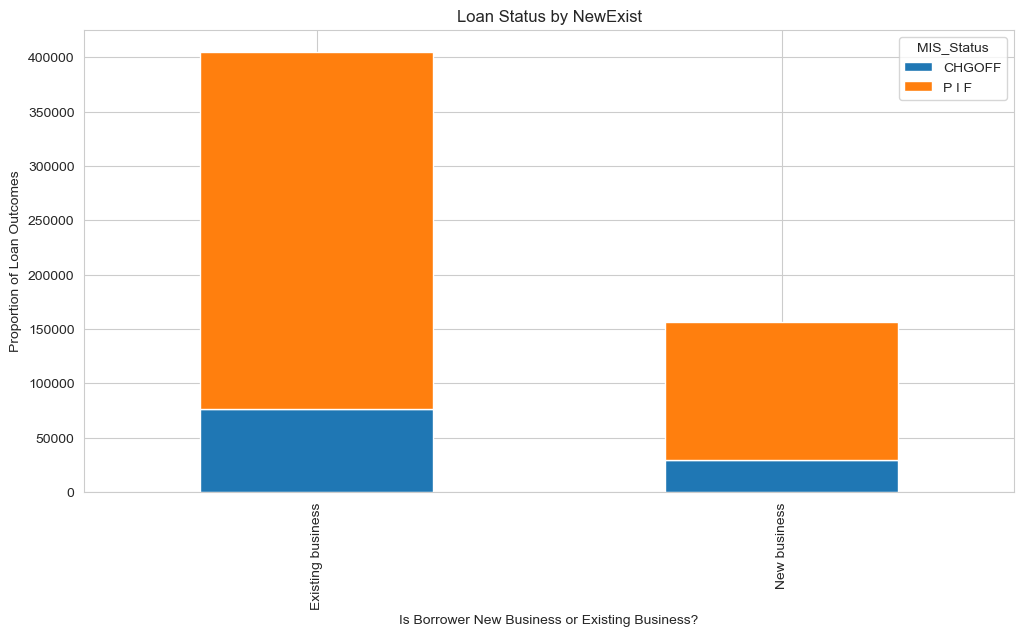

In [105]:
new_exist_crosstab = pd.crosstab(sba_loans['NewExist'], sba_loans['MIS_Status'])
new_exist_crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Loan Status by NewExist')
plt.xlabel('Is Borrower New Business or Existing Business?')
plt.ylabel('Proportion of Loan Outcomes')
plt.show()

#### Cannot draw conclusion

<font size = 4>Plot the count of the 'SameState ' column</font>

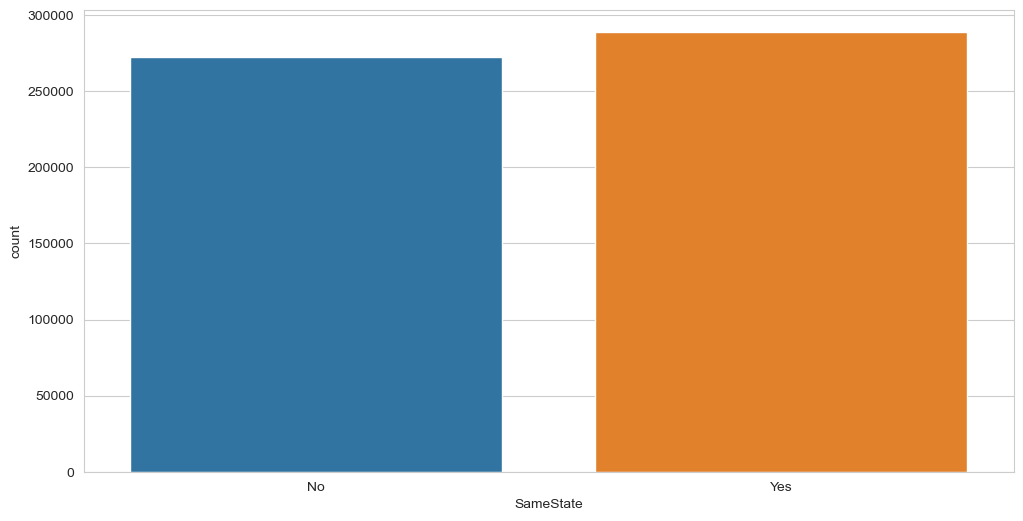

In [106]:
plt.figure(figsize=(12,6))
sns.countplot(data = sba_loans, x = 'SameState')
plt.show()

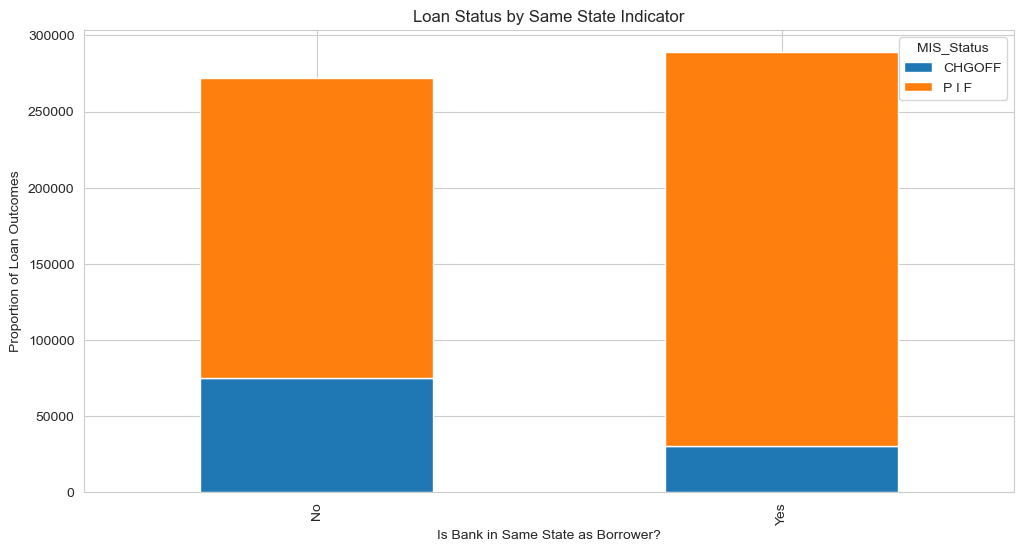

In [107]:
same_state_crosstab = pd.crosstab(sba_loans['SameState'], sba_loans['MIS_Status'])
same_state_crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Loan Status by Same State Indicator')
plt.xlabel('Is Bank in Same State as Borrower?')
plt.ylabel('Proportion of Loan Outcomes')
plt.show()

#### It's apparent that the proportion of 'CHGOFF' loans tends to be higher if the banks are not in the same state with borrower.

<font size = 4>Plot the count of the 'UrbanRural' column</font>

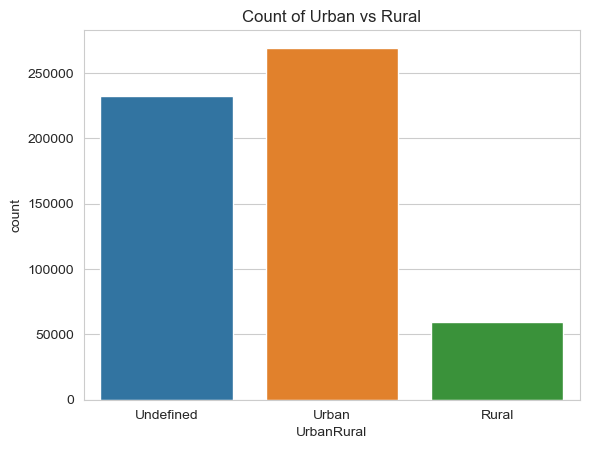

In [108]:
sns.countplot(x='UrbanRural', data=sba_loans)
plt.title('Count of Urban vs Rural')
plt.show()

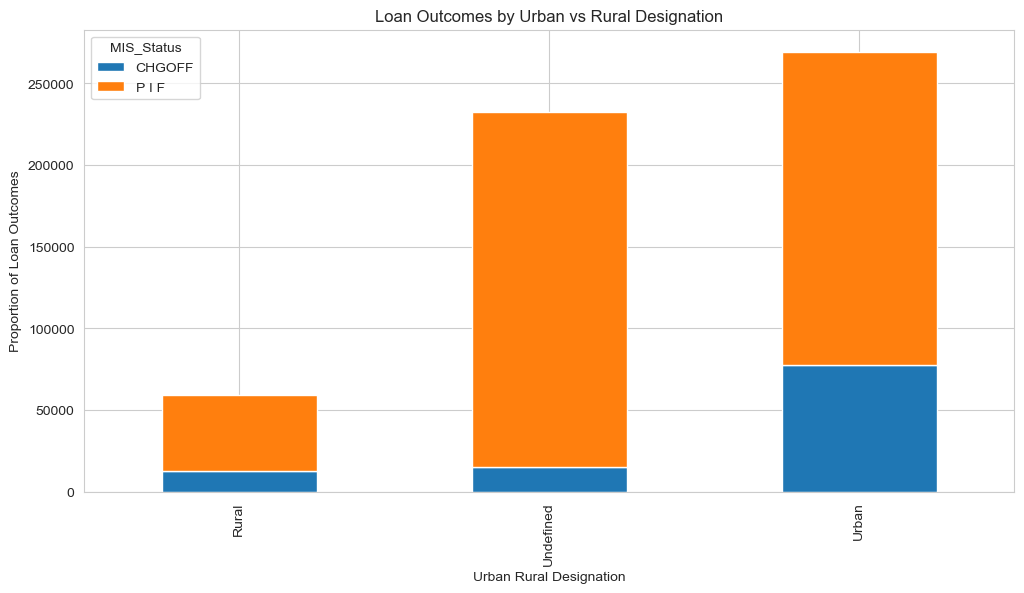

In [109]:
urban_rural_crosstab = pd.crosstab(sba_loans['UrbanRural'], sba_loans['MIS_Status'])
urban_rural_crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Loan Outcomes by Urban vs Rural Designation')
plt.xlabel('Urban Rural Designation')
plt.ylabel('Proportion of Loan Outcomes')
plt.legend(title='MIS_Status')
plt.show()

####  It seems urban areas showing a higher proportion of charged-off loans compared to rural areas. But presence of large amount of undefined data make us hard to draw to hypothesis.

<font size = 4>Plot the count of the 'RevLineCr' column</font>

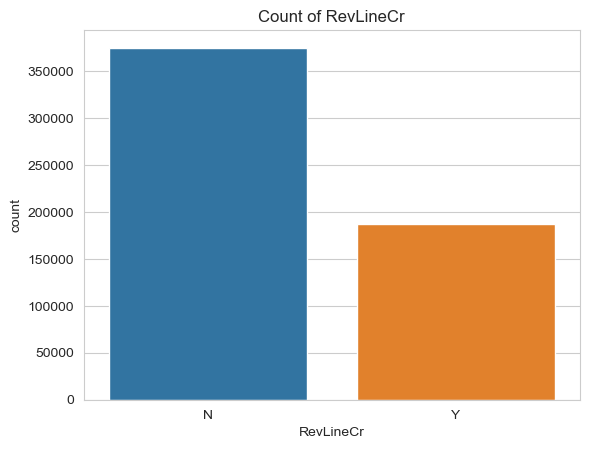

In [110]:
sns.countplot(x='RevLineCr', data=sba_loans)
plt.title('Count of RevLineCr')
plt.show()

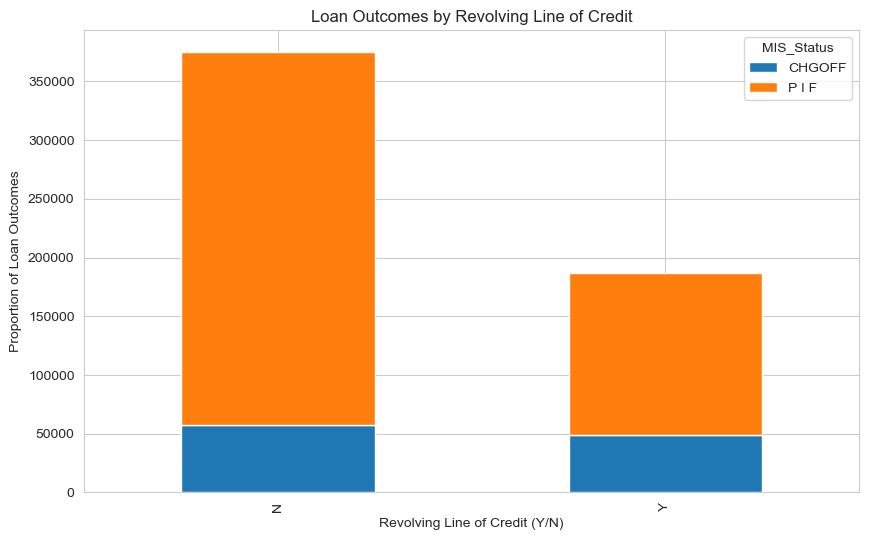

In [111]:
revline_crosstab = pd.crosstab(sba_loans['RevLineCr'], sba_loans['MIS_Status'])
revline_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Outcomes by Revolving Line of Credit')
plt.xlabel('Revolving Line of Credit (Y/N)')
plt.ylabel('Proportion of Loan Outcomes')
plt.show()

#### The loans with a revolving line of credit have a higher proportion of charge-offs relative to the total number of such loans.

<font size = 4>Plot the count of the 'LowDoc' column</font>

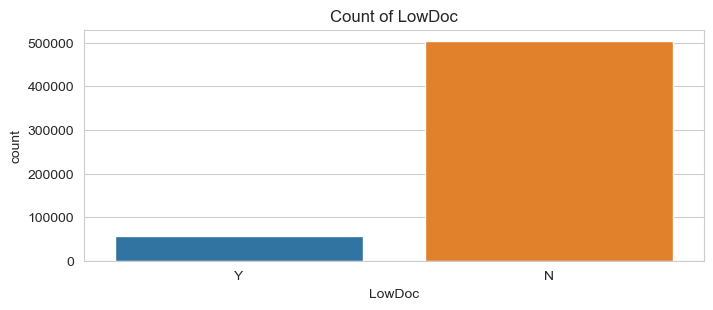

In [112]:
plt.figure(figsize=(8,3))
sns.countplot(x='LowDoc', data=sba_loans)
plt.title('Count of LowDoc')
plt.show()

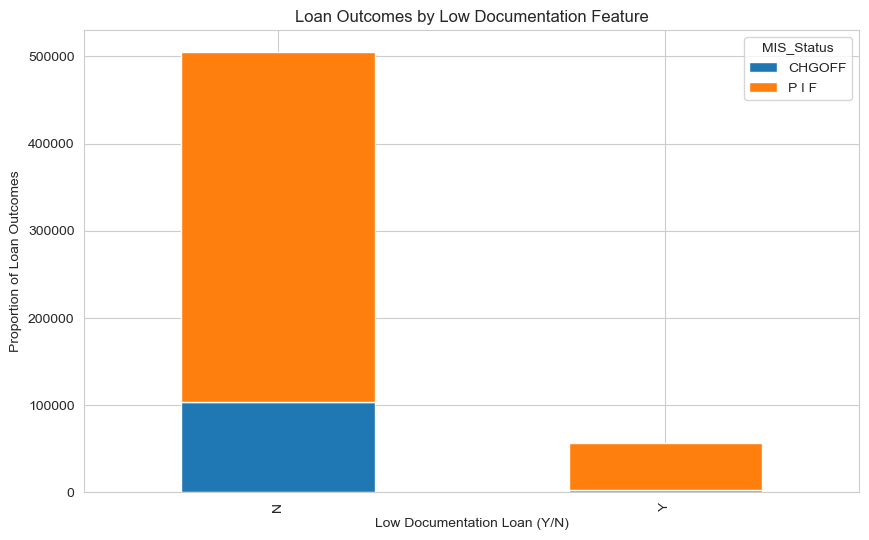

In [113]:
lowdoc_crosstab = pd.crosstab(sba_loans['LowDoc'], sba_loans['MIS_Status'])
lowdoc_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Outcomes by Low Documentation Feature')
plt.xlabel('Low Documentation Loan (Y/N)')
plt.ylabel('Proportion of Loan Outcomes')
plt.show()

#### Loans that are not in LowDoc Loan Program have a much higher risk of 'CHGOFF'.

<font size = 4>Plot the count of the 'Industry' column</font>

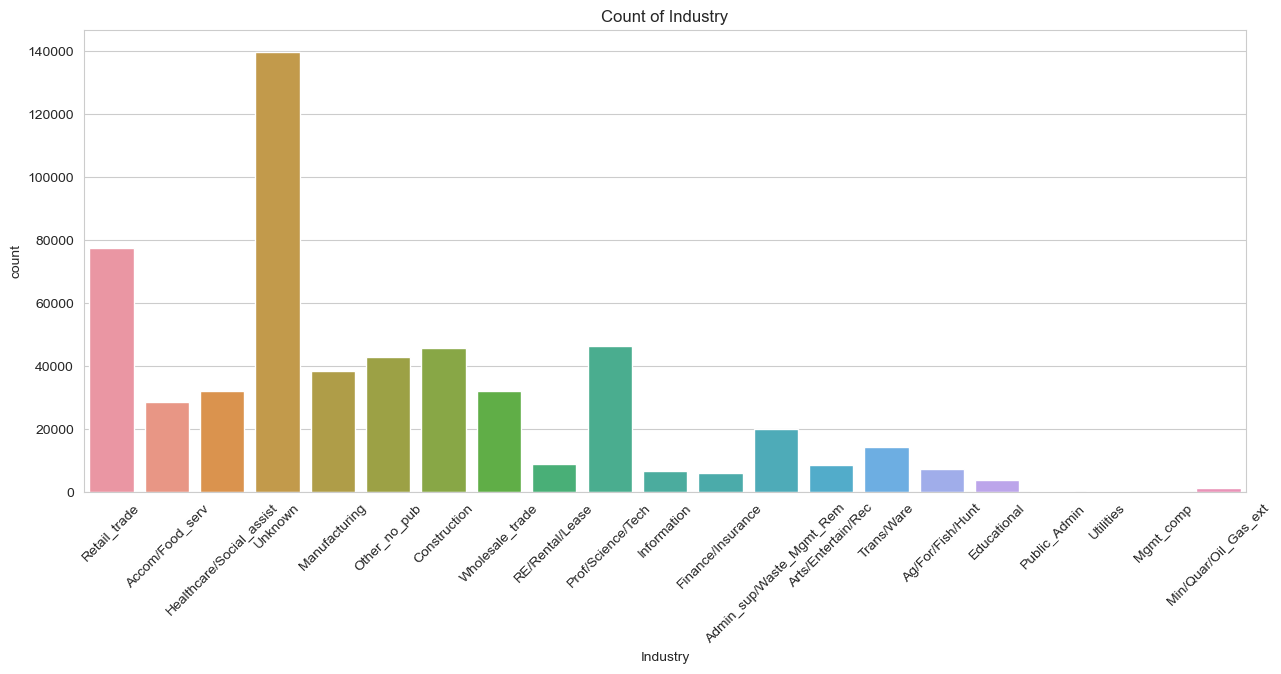

In [114]:
plt.figure(figsize=(15,6))
sns.countplot(x='Industry', data=sba_loans)
plt.xticks(rotation=45)
plt.title('Count of Industry')
plt.show()

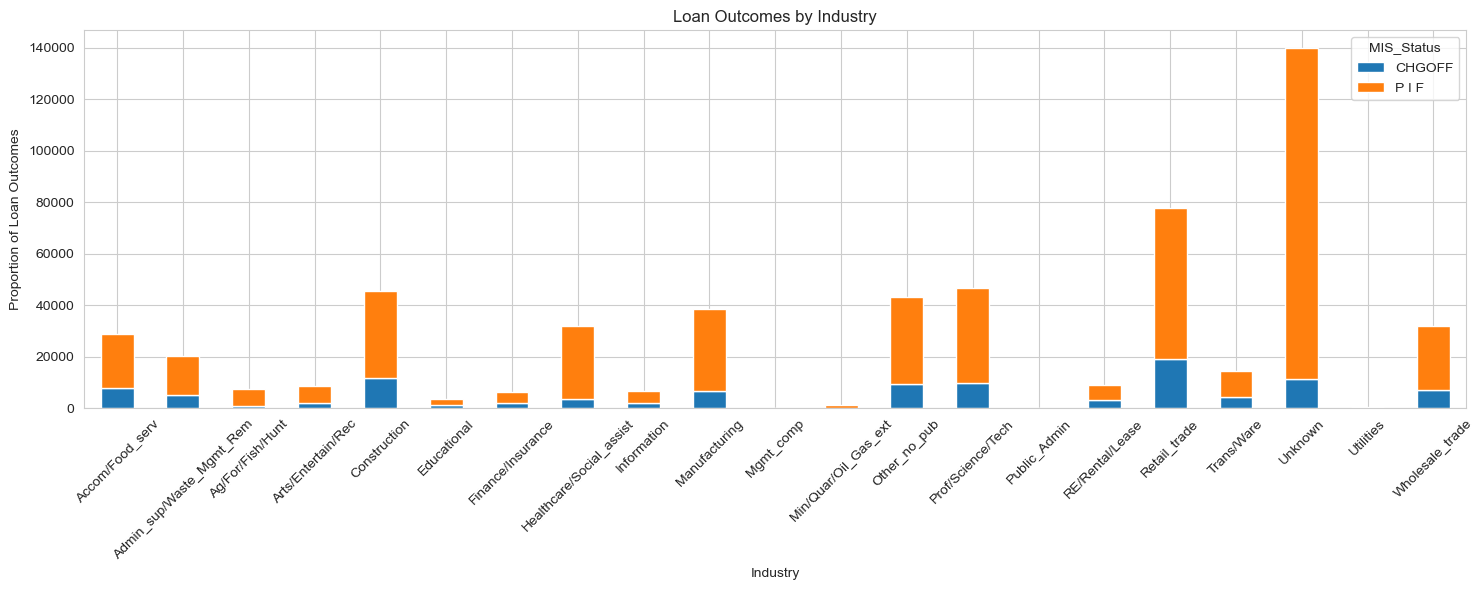

In [115]:
industry_crosstab = pd.crosstab(sba_loans['Industry'], sba_loans['MIS_Status'])
industry_crosstab.plot(kind='bar', stacked=True, figsize=(15, 6))

plt.title('Loan Outcomes by Industry')
plt.xlabel('Industry')
plt.ylabel('Proportion of Loan Outcomes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Cannot draw useful information from this

<font size = 4>Plot the count of the 'IsFranchise' column</font>

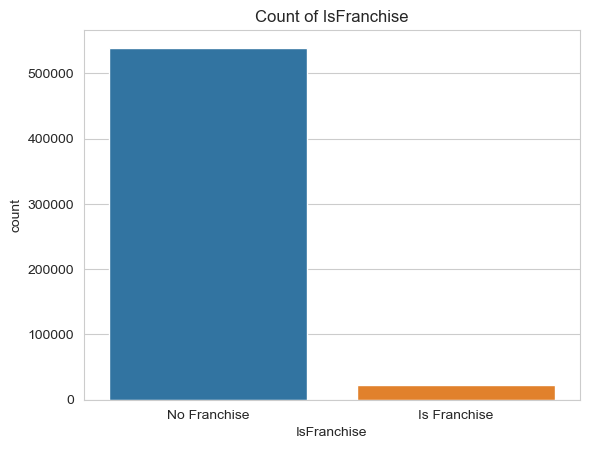

In [116]:
sns.countplot(x='IsFranchise', data=sba_loans)
plt.title('Count of IsFranchise')
plt.show()

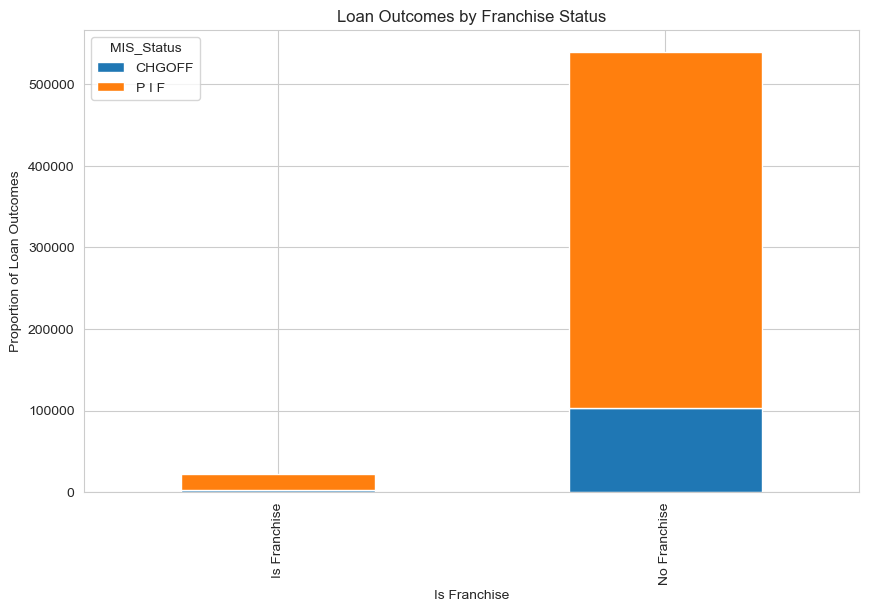

In [117]:
franchise_crosstab = pd.crosstab(sba_loans['IsFranchise'], sba_loans['MIS_Status'])
franchise_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Loan Outcomes by Franchise Status')
plt.xlabel('Is Franchise')
plt.ylabel('Proportion of Loan Outcomes')
plt.show()

#### Loans that are not Franchise have a much higher risk of 'CHGOFF'.

In [118]:
sba_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561422 entries, 0 to 899163
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              561422 non-null  object 
 1   BankState          561422 non-null  object 
 2   Term               561422 non-null  int64  
 3   NoEmp              561422 non-null  int64  
 4   NewExist           561422 non-null  object 
 5   CreateJob          561422 non-null  int64  
 6   RetainedJob        561422 non-null  int64  
 7   UrbanRural         561422 non-null  object 
 8   RevLineCr          561422 non-null  object 
 9   LowDoc             561422 non-null  object 
 10  DisbursementGross  561422 non-null  float64
 11  MIS_Status         561422 non-null  object 
 12  SBA_Appv           561422 non-null  float64
 13  Industry           561422 non-null  object 
 14  IsFranchise        561422 non-null  object 
 15  SameState          561422 non-null  object 
dtypes:

<font size = 4>Bivariate Analysis</font>

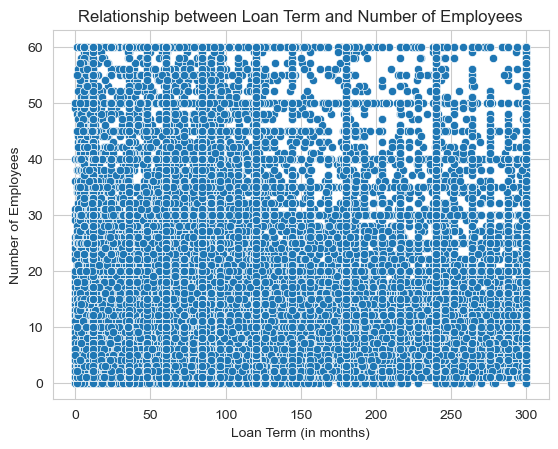

In [119]:
# Term vs. NoEmp
sns.scatterplot(x='Term', y='NoEmp', data=sba_loans)
plt.title('Relationship between Loan Term and Number of Employees')
plt.xlabel('Loan Term (in months)')
plt.ylabel('Number of Employees')
plt.show()

In [120]:
# Correlation Analysis.
# 1 means a perfect positive linear relationship,
# -1 means a perfect negative linear relationship, and
# 0 means no linear relationship.
sba_loans['Term'].corr(sba_loans['NoEmp'])

0.20327123489864865

#### Weak relationship between Loan Term and Number of Employees

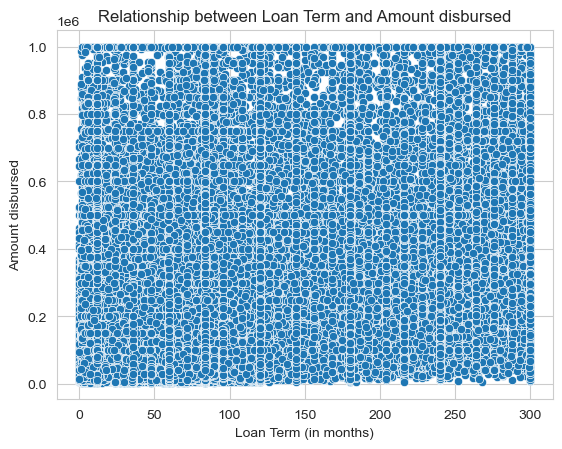

In [121]:
# Term vs. DisbursementGross
sns.scatterplot(x='Term', y='DisbursementGross', data=sba_loans)
plt.title('Relationship between Loan Term and Amount disbursed')
plt.xlabel('Loan Term (in months)')
plt.ylabel('Amount disbursed')
plt.show()

In [122]:
sba_loans['Term'].corr(sba_loans['DisbursementGross'])

0.469402302627951

#### Loan Term and Amount disbursed are related!!

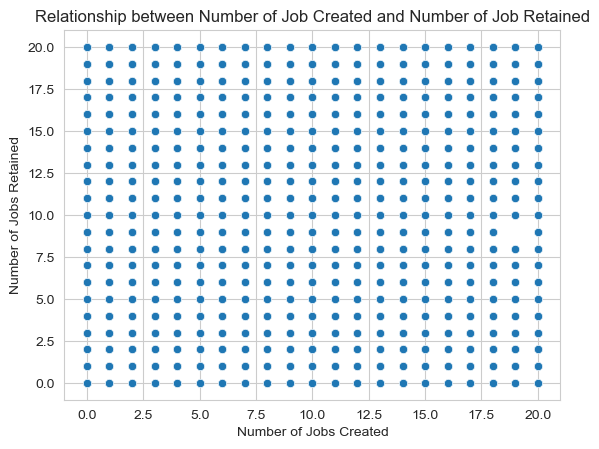

In [123]:
# CreateJob vs. RetainedJob
sns.scatterplot(x='CreateJob', y='RetainedJob', data=sba_loans)
plt.title('Relationship between Number of Job Created and Number of Job Retained')
plt.xlabel('Number of Jobs Created')
plt.ylabel('Number of Jobs Retained')
plt.show()

In [124]:
sba_loans['CreateJob'].corr(sba_loans['RetainedJob'])

0.2748646911602985

#### There are relationship between number of job created and numebr of job retained

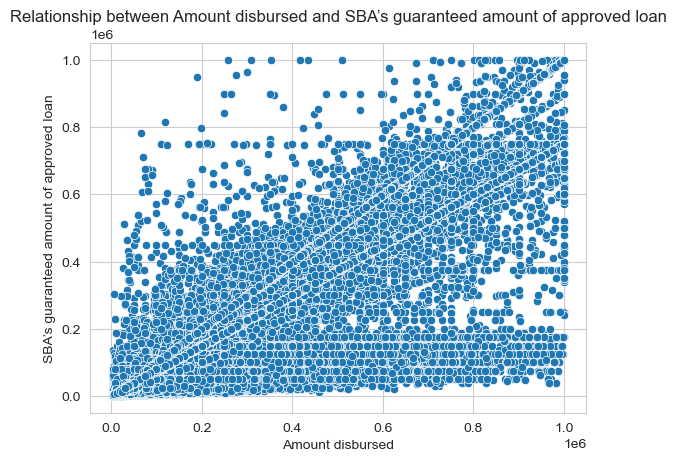

In [125]:
# DisbursementGross vs. SBA_Appv
sns.scatterplot(x='DisbursementGross', y='SBA_Appv', data=sba_loans)
plt.title('Relationship between Amount disbursed and SBA’s guaranteed amount of approved loan')
plt.xlabel('Amount disbursed')
plt.ylabel('SBA’s guaranteed amount of approved loan')
plt.show()

#### DisbursementGross and  SBA_Appv are strongly related

## Modeling

We start our modeling by conducting one-hot encoding to categorical data and splitting our dataset to training set and tesing set 

In [126]:
sba_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561422 entries, 0 to 899163
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              561422 non-null  object 
 1   BankState          561422 non-null  object 
 2   Term               561422 non-null  int64  
 3   NoEmp              561422 non-null  int64  
 4   NewExist           561422 non-null  object 
 5   CreateJob          561422 non-null  int64  
 6   RetainedJob        561422 non-null  int64  
 7   UrbanRural         561422 non-null  object 
 8   RevLineCr          561422 non-null  object 
 9   LowDoc             561422 non-null  object 
 10  DisbursementGross  561422 non-null  float64
 11  MIS_Status         561422 non-null  object 
 12  SBA_Appv           561422 non-null  float64
 13  Industry           561422 non-null  object 
 14  IsFranchise        561422 non-null  object 
 15  SameState          561422 non-null  object 
dtypes:

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [128]:
# Initialize the one-hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [129]:
# Fit the encoder to our categorical columns. 
encoder.fit(sba_loans[['State', 'BankState', 'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Industry', 'IsFranchise', 'SameState']])

OneHotEncoder(handle_unknown='ignore')

In [130]:
# Transform the data to get a sparse matrix with one-hot encoded variables:
encoded_features = encoder.transform(sba_loans[['State', 'BankState', 'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc','Industry', 'IsFranchise', 'SameState']])

In [131]:
# Convert this sparse matrix to a DataFrame 
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out())

In [132]:
# Drop the old categorical columns
sba_loans = sba_loans.drop(['State', 'BankState', 'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Industry', 'IsFranchise', 'SameState'], axis=1)

# Concatenate the original DataFrame and the new one-hot encoded DataFrame
sba_loans = pd.concat([sba_loans.reset_index(drop=True), encoded_df], axis=1)

In [133]:
sba_loans.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,MIS_Status,SBA_Appv,State_AK,State_AL,State_AR,...,Industry_RE/Rental/Lease,Industry_Retail_trade,Industry_Trans/Ware,Industry_Unknown,Industry_Utilities,Industry_Wholesale_trade,IsFranchise_Is Franchise,IsFranchise_No Franchise,SameState_No,SameState_Yes
0,84,4,0,0,60000.0,P I F,48000.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,60,2,0,0,40000.0,P I F,32000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,180,7,0,0,287000.0,P I F,215250.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,60,2,0,0,35000.0,P I F,28000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,240,14,7,7,229000.0,P I F,229000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [134]:
feature_matrix = sba_loans.drop('MIS_Status', axis = 1)
target = sba_loans['MIS_Status']

In [135]:
# Split the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, target, random_state=42, test_size = 0.2)

In [136]:
# Need to encode the labels into numeric values to avoid errors that arise from using non-numeric labels.
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test) 

### Radom Forests

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
 # Because our data is imblanced, we set hyperparameter class_weight as 'balanced' to make the classifier to pay more attention to the minority class.
model_rdf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [139]:
model_rdf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [140]:
y_predicted_rdf = model_rdf.predict(X_test)

In [141]:
# Get accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, y_predicted_rdf)}")

Accuracy Score: 0.9355924656009262


In [142]:
# Get classification report
print(classification_report(y_test, y_predicted_rdf))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82     21298
           1       0.94      0.98      0.96     90987

    accuracy                           0.94    112285
   macro avg       0.92      0.86      0.89    112285
weighted avg       0.93      0.94      0.93    112285



<font size = 4> Our random forests model has pretty good performance.</font>

<font size = 4>Use Grid Search CV for Hyperparameter Tunning</font>

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
param_grid_rdf = { 'n_estimators': [100, 200, 300],  # The number of trees in the forest.
                   'max_depth': [5, 10, 20],  # Maximum number of levels in each decision tree.
                 }

In [145]:
grid_search_rdf = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), param_grid_rdf, cv=5, scoring='recall')

In [146]:
grid_search_rdf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [147]:
grid_search_rdf.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [148]:
best_rdf = grid_search_rdf.best_estimator_

In [149]:
y_predicted_grid_rdf = best_rdf.predict(X_test)

In [150]:
print(f"Accuracy Score: {accuracy_score(y_test, y_predicted_grid_rdf)}")

Accuracy Score: 0.901678763859821


In [151]:
print(classification_report(y_test, y_predicted_grid_rdf))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76     21298
           1       0.96      0.92      0.94     90987

    accuracy                           0.90    112285
   macro avg       0.83      0.87      0.85    112285
weighted avg       0.91      0.90      0.90    112285



<font size = 4> Even though we get a lower accuracy score after implementing Grid Search CV, we achieve a higher recall score for "CHGOFF". This means our model could identify more companies that would charged off. That's the result that we want.</font>